<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-Import" data-toc-modified-id="Library-Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library Import</a></span></li><li><span><a href="#Ploynomial-Regression-Class" data-toc-modified-id="Ploynomial-Regression-Class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ploynomial Regression Class</a></span></li><li><span><a href="#Demo-1:-w3school-data" data-toc-modified-id="Demo-1:-w3school-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demo 1: w3school data</a></span></li><li><span><a href="#Demo-2:-Generated-data" data-toc-modified-id="Demo-2:-Generated-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Demo 2: Generated data</a></span></li><li><span><a href="#Demo-3:-Complex-model-of-w3school-data" data-toc-modified-id="Demo-3:-Complex-model-of-w3school-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Demo 3: Complex model of w3school data</a></span></li></ul></div>

## Library Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ploynomial Regression Class
- Create methods that allow a user to build models using Polynomial Regression.
- A user should be able to specify a degree of a polynomial.
- For training the models, use a close form solution/normal equation. 
- Your learning method should allow the user to choose to regularize a model.

In [2]:
class PolyRegression:
    
    """
    A polynomial regression class:
    Class Attributes:
    x: Independent Variable Input
    y: Dependent Variable Input
    d: Polynomial Degree
    
    Use Sequence:
    1: designMatrix(), 2: polyfit(), 3:plot()
    4: regularize(), 5: reguPlot(), 6: pred(), 7: reguPred()
    """
    
    def __init__(self, x, y, d):
        self.x = x
        self.y = y
        self.d = d
        
    def designMatrix(self):
        return np.vander(self.x, self.d+1 ,increasing=True) # # dimensions = degree + 1
    
    def ployfit(self):
        global poly, X, var
        X = self.designMatrix()
        # normal equation
        β = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(self.y)
        var = (1/X.shape[0])*(self.y-X.dot(β)).T.dot(self.y-X.dot(β)) #sigma 
        # Polynomial construction starting with the highest degree
        poly = np.poly1d(np.flip(β)) 
        print('Betas:')
        print(β)
        print('Model Equation:')
        print(poly)
        print('Variance:', var)
    
    def plot(self):
        plt.scatter(self.x, self.y, label = "Data")
        plt.plot(self.x, poly(self.x), color = 'r', label = 'Model')
        plt.plot(self.x, poly(self.x) + np.sqrt(var), color = 'k', label = 'y(+/-) 1*std')
        plt.plot(self.x, poly(self.x) - np.sqrt(var), color = 'k')
        plt.ylabel('y', rotation = 0, labelpad=20)
        plt.xlabel('x', labelpad=10)
        plt.legend(loc = "upper left")
        plt.title('Polynomial Regression')
        plt.show();
    
    
    def regularize(self, λ):
        global reg_ploy, var_reg
        I = np.eye(self.d + 1) # dimensions = degree + 1
        I[0,0] = 0
        # Regularization 
        β_regu = np.linalg.inv(X.T.dot(X) + λ*I).dot(X.T).dot(self.y)
        var_reg = (1/X.shape[0])*(self.y-X.dot(β_regu)).T.dot(self.y-X.dot(β_regu))
        # Polynomial construction starting with the highest degree
        reg_ploy = np.poly1d(np.flip(β_regu))
        print('Betas:')
        print(β_regu)
        print('Model Equation:')
        print(reg_ploy)
        print('variance:', var_reg)
        
    def reguPlot(self):
        plt.scatter(self.x, self.y, label = "Data")
        plt.plot(self.x, reg_ploy(self.x), color = 'r', label = 'Model')
        plt.plot(self.x, reg_ploy(self.x) + np.sqrt(var_reg), color = 'k', label = 'y(+/-) 1*std')
        plt.plot(self.x, reg_ploy(self.x) - np.sqrt(var_reg), color = 'k')
        plt.ylabel('y', rotation = 0, labelpad=20)
        plt.xlabel('x', labelpad=10)
        plt.legend(loc = "upper left")
        plt.title('Regularized Polynomial Regression')
        plt.show();
        
    def pred(self, val):
        return poly(val)
    
    def reguPred(self, val):
        return reg_ploy(val)

In [3]:
help(PolyRegression)

Help on class PolyRegression in module __main__:

class PolyRegression(builtins.object)
 |  PolyRegression(x, y, d)
 |  
 |  A polynomial regression class:
 |  Class Attributes:
 |  x: Independent Variable Input
 |  y: Dependent Variable Input
 |  d: Polynomial Degree
 |  
 |  Use Sequence:
 |  1: designMatrix(), 2: polyfit(), 3:plot()
 |  4: regularize(), 5: reguPlot(), 6: pred(), 7: reguPred()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, y, d)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  designMatrix(self)
 |  
 |  plot(self)
 |  
 |  ployfit(self)
 |  
 |  pred(self, val)
 |  
 |  reguPlot(self)
 |  
 |  reguPred(self, val)
 |  
 |  regularize(self, λ)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Demo 1: w3school data

x and y data source: https://www.w3schools.com/python/python_ml_polynomial_regression.asp

In [4]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [5]:
p1 = PolyRegression(x,y, 3)

In [6]:
p1.designMatrix()

array([[    1,     1,     1,     1],
       [    1,     2,     4,     8],
       [    1,     3,     9,    27],
       [    1,     5,    25,   125],
       [    1,     6,    36,   216],
       [    1,     7,    49,   343],
       [    1,     8,    64,   512],
       [    1,     9,    81,   729],
       [    1,    10,   100,  1000],
       [    1,    12,   144,  1728],
       [    1,    13,   169,  2197],
       [    1,    14,   196,  2744],
       [    1,    15,   225,  3375],
       [    1,    16,   256,  4096],
       [    1,    18,   324,  5832],
       [    1,    19,   361,  6859],
       [    1,    21,   441,  9261],
       [    1,    22,   484, 10648]])

In [7]:
p1.ployfit()

Betas:
[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
Model Equation:
          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8
Variance: 12.473061469757239


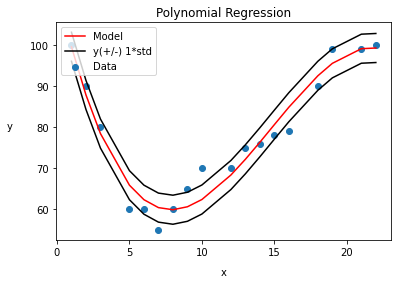

In [8]:
p1.plot()

In [9]:
p1.pred(17)

88.87331269697235

In [10]:
p1.regularize(0)

Betas:
[ 1.13768037e+02 -1.55383039e+01  1.34333191e+00 -3.03208795e-02]
Model Equation:
          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8
variance: 12.473061469757239


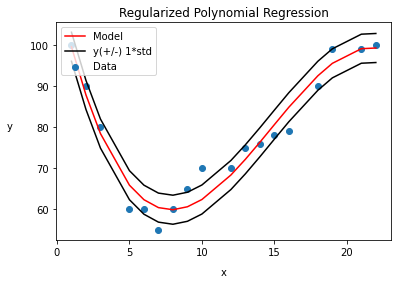

In [11]:
p1.reguPlot()

In [12]:
p1.regularize(0.1)

Betas:
[ 1.13212503e+02 -1.53049997e+01  1.32044095e+00 -2.96957667e-02]
Model Equation:
         3        2
-0.0297 x + 1.32 x - 15.3 x + 113.2
variance: 12.493066827321694


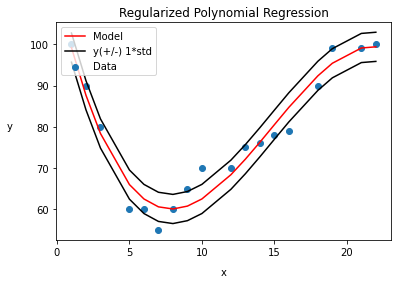

In [13]:
p1.reguPlot()

In [14]:
p1.regularize(1)

Betas:
[ 1.08874633e+02 -1.34832796e+01  1.14170218e+00 -2.48147512e-02]
Model Equation:
          3         2
-0.02481 x + 1.142 x - 13.48 x + 108.9
variance: 14.025217285239263


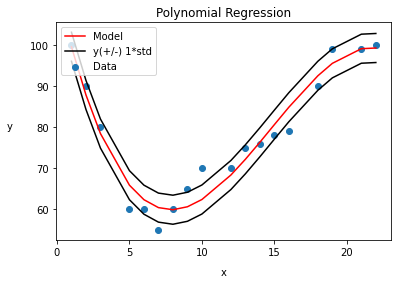

In [15]:
p1.plot()

In [16]:
p1.regularize(10)

Betas:
[ 9.14372545e+01 -6.16169370e+00  4.23425293e-01 -5.20150183e-03]
Model Equation:
           3          2
-0.005202 x + 0.4234 x - 6.162 x + 91.44
variance: 44.78719603328714


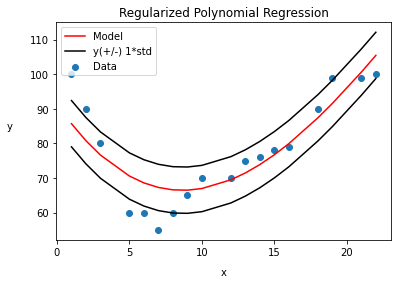

In [17]:
p1.reguPlot()

In [18]:
p1.reguPred(17)

83.5033927939896

## Demo 2: Generated data

In [19]:
# Generating 3rd order polynomial data
n = 51
β_0 = 6.1
β_1 = 25.7
β_2 = 3.9
β_3 = -4.5

μ = 0
sigma = 20
ϵ = np.random.normal(μ, sigma, n)
x_gen = np.linspace(-4,4,n)
y_gen = β_0 + β_1*x_gen + β_2*(x_gen**2) + β_3*(x_gen**3) + ϵ

In [20]:
p2 = PolyRegression(x_gen, y_gen, 3)

In [21]:
p2.designMatrix()

array([[ 1.0000000e+00, -4.0000000e+00,  1.6000000e+01, -6.4000000e+01],
       [ 1.0000000e+00, -3.8400000e+00,  1.4745600e+01, -5.6623104e+01],
       [ 1.0000000e+00, -3.6800000e+00,  1.3542400e+01, -4.9836032e+01],
       [ 1.0000000e+00, -3.5200000e+00,  1.2390400e+01, -4.3614208e+01],
       [ 1.0000000e+00, -3.3600000e+00,  1.1289600e+01, -3.7933056e+01],
       [ 1.0000000e+00, -3.2000000e+00,  1.0240000e+01, -3.2768000e+01],
       [ 1.0000000e+00, -3.0400000e+00,  9.2416000e+00, -2.8094464e+01],
       [ 1.0000000e+00, -2.8800000e+00,  8.2944000e+00, -2.3887872e+01],
       [ 1.0000000e+00, -2.7200000e+00,  7.3984000e+00, -2.0123648e+01],
       [ 1.0000000e+00, -2.5600000e+00,  6.5536000e+00, -1.6777216e+01],
       [ 1.0000000e+00, -2.4000000e+00,  5.7600000e+00, -1.3824000e+01],
       [ 1.0000000e+00, -2.2400000e+00,  5.0176000e+00, -1.1239424e+01],
       [ 1.0000000e+00, -2.0800000e+00,  4.3264000e+00, -8.9989120e+00],
       [ 1.0000000e+00, -1.9200000e+00,  3.6864000e

In [22]:
p2.ployfit()

Betas:
[ 7.61743218 25.67107903  3.73459474 -4.51818082]
Model Equation:
        3         2
-4.518 x + 3.735 x + 25.67 x + 7.617
Variance: 339.9804341318682


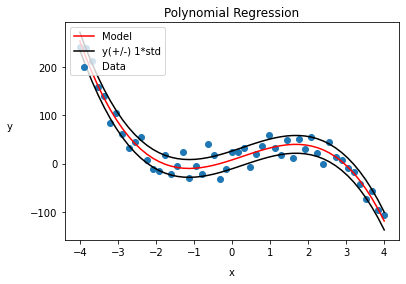

In [23]:
p2.plot()

In [24]:
p2.pred(2)

37.752522602895745

In [25]:
p2.regularize(0)

Betas:
[ 7.61743218 25.67107903  3.73459474 -4.51818082]
Model Equation:
        3         2
-4.518 x + 3.735 x + 25.67 x + 7.617
variance: 339.9804341318682


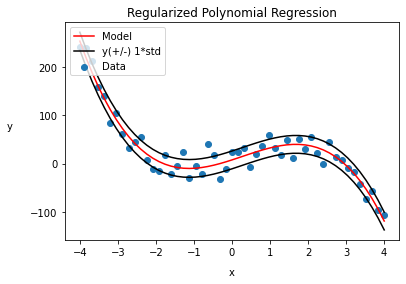

In [26]:
p2.reguPlot()

In [27]:
p2.regularize(0.1)

Betas:
[ 7.61908421 25.61349318  3.73429689 -4.51331742]
Model Equation:
        3         2
-4.513 x + 3.734 x + 25.61 x + 7.619
variance: 339.98337145954827


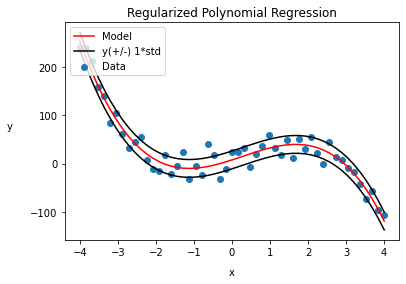

In [28]:
p2.reguPlot()

In [29]:
p2.regularize(1)

Betas:
[ 7.63394063 25.10653155  3.73161845 -4.4705007 ]
Model Equation:
        3         2
-4.471 x + 3.732 x + 25.11 x + 7.634
variance: 340.2627496082567


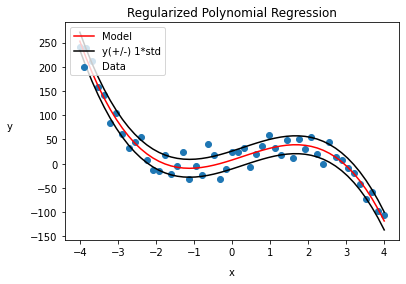

In [30]:
p2.reguPlot()

In [31]:
p2.regularize(10)

Betas:
[ 7.78134107 20.95244305  3.70504385 -4.11954361]
Model Equation:
       3         2
-4.12 x + 3.705 x + 20.95 x + 7.781
variance: 359.7095796758664


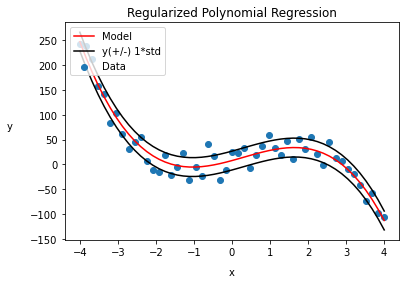

In [32]:
p2.reguPlot()

In [33]:
p2.regularize(100)

Betas:
[ 9.147554    7.80946005  3.45873143 -3.00489257]
Model Equation:
        3         2
-3.005 x + 3.459 x + 7.809 x + 9.148
variance: 624.2765234141642


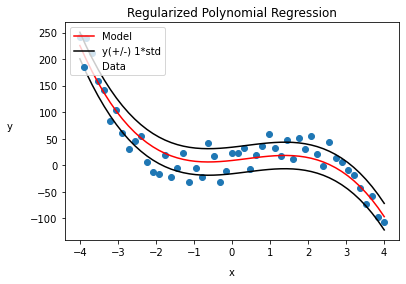

In [34]:
p2.reguPlot()

In [35]:
p2.reguPred(2)

14.562259224165205

## Demo 3: Complex model of w3school data

In [36]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [37]:
p3 = PolyRegression(x,y, 8)

In [38]:
p3.designMatrix()

array([[          1,           1,           1,           1,           1,
                  1,           1,           1,           1],
       [          1,           2,           4,           8,          16,
                 32,          64,         128,         256],
       [          1,           3,           9,          27,          81,
                243,         729,        2187,        6561],
       [          1,           5,          25,         125,         625,
               3125,       15625,       78125,      390625],
       [          1,           6,          36,         216,        1296,
               7776,       46656,      279936,     1679616],
       [          1,           7,          49,         343,        2401,
              16807,      117649,      823543,     5764801],
       [          1,           8,          64,         512,        4096,
              32768,      262144,     2097152,    16777216],
       [          1,           9,          81,         729,   

In [39]:
p3.ployfit()

Betas:
[-139.2985056   -53.89830946  -19.45517203   -8.71132316  -14.79396215
  -16.73150752  -15.90320429  -12.67451795  -13.42600565]
Model Equation:
        8         7        6         5         4         3         2
-13.43 x - 12.67 x - 15.9 x - 16.73 x - 14.79 x - 8.711 x - 19.46 x - 53.9 x - 139.3
Variance: 1.5378180476418425e+20


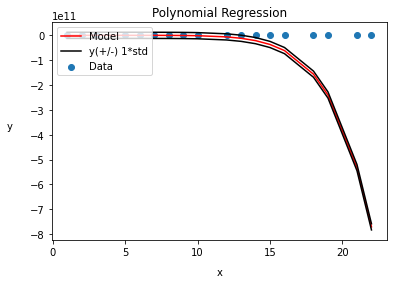

In [40]:
p3.plot()

In [41]:
p3.regularize(0)

Betas:
[-139.2985056   -53.89830946  -19.45517203   -8.71132316  -14.79396215
  -16.73150752  -15.90320429  -12.67451795  -13.42600565]
Model Equation:
        8         7        6         5         4         3         2
-13.43 x - 12.67 x - 15.9 x - 16.73 x - 14.79 x - 8.711 x - 19.46 x - 53.9 x - 139.3
variance: 1.5378180476418425e+20


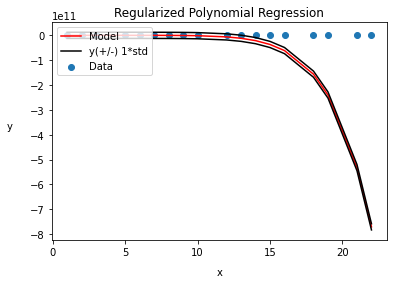

In [42]:
p3.reguPlot()

In [43]:
p3.pred(17)

-99266309809.39308